# chapter 1

In [1]:
#문제1
# conda create -n WEEK1 python=3.8
# conda activate WEEK1

#문제2
# pip install pandas==1.4.4 
# 다른 라이브러리들도 같은 방법

#문제4
# pip install jupyter notebook

# chapter 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import statsmodels as sm
import sklearn

In [3]:
#문제1
data = pd.read_csv('concrete_data.csv')
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
#문제2
target = data['Strength']
data.drop(['Strength'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(824, 206, 824, 206)

In [5]:
#문제3
x_train.describe()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,283.360801,74.371602,181.797087,6.163956,973.548544,772.107403,44.661408
std,107.536404,86.977784,21.321905,5.967258,78.694630,80.984717,60.475702
min,102.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000
50%,275.100000,22.000000,185.350000,6.100000,968.000000,778.500000,28.000000
75%,359.900000,144.775000,192.000000,10.125000,1040.600000,821.250000,56.000000
max,540.000000,359.400000,247.000000,32.200000,1145.000000,992.600000,365.000000


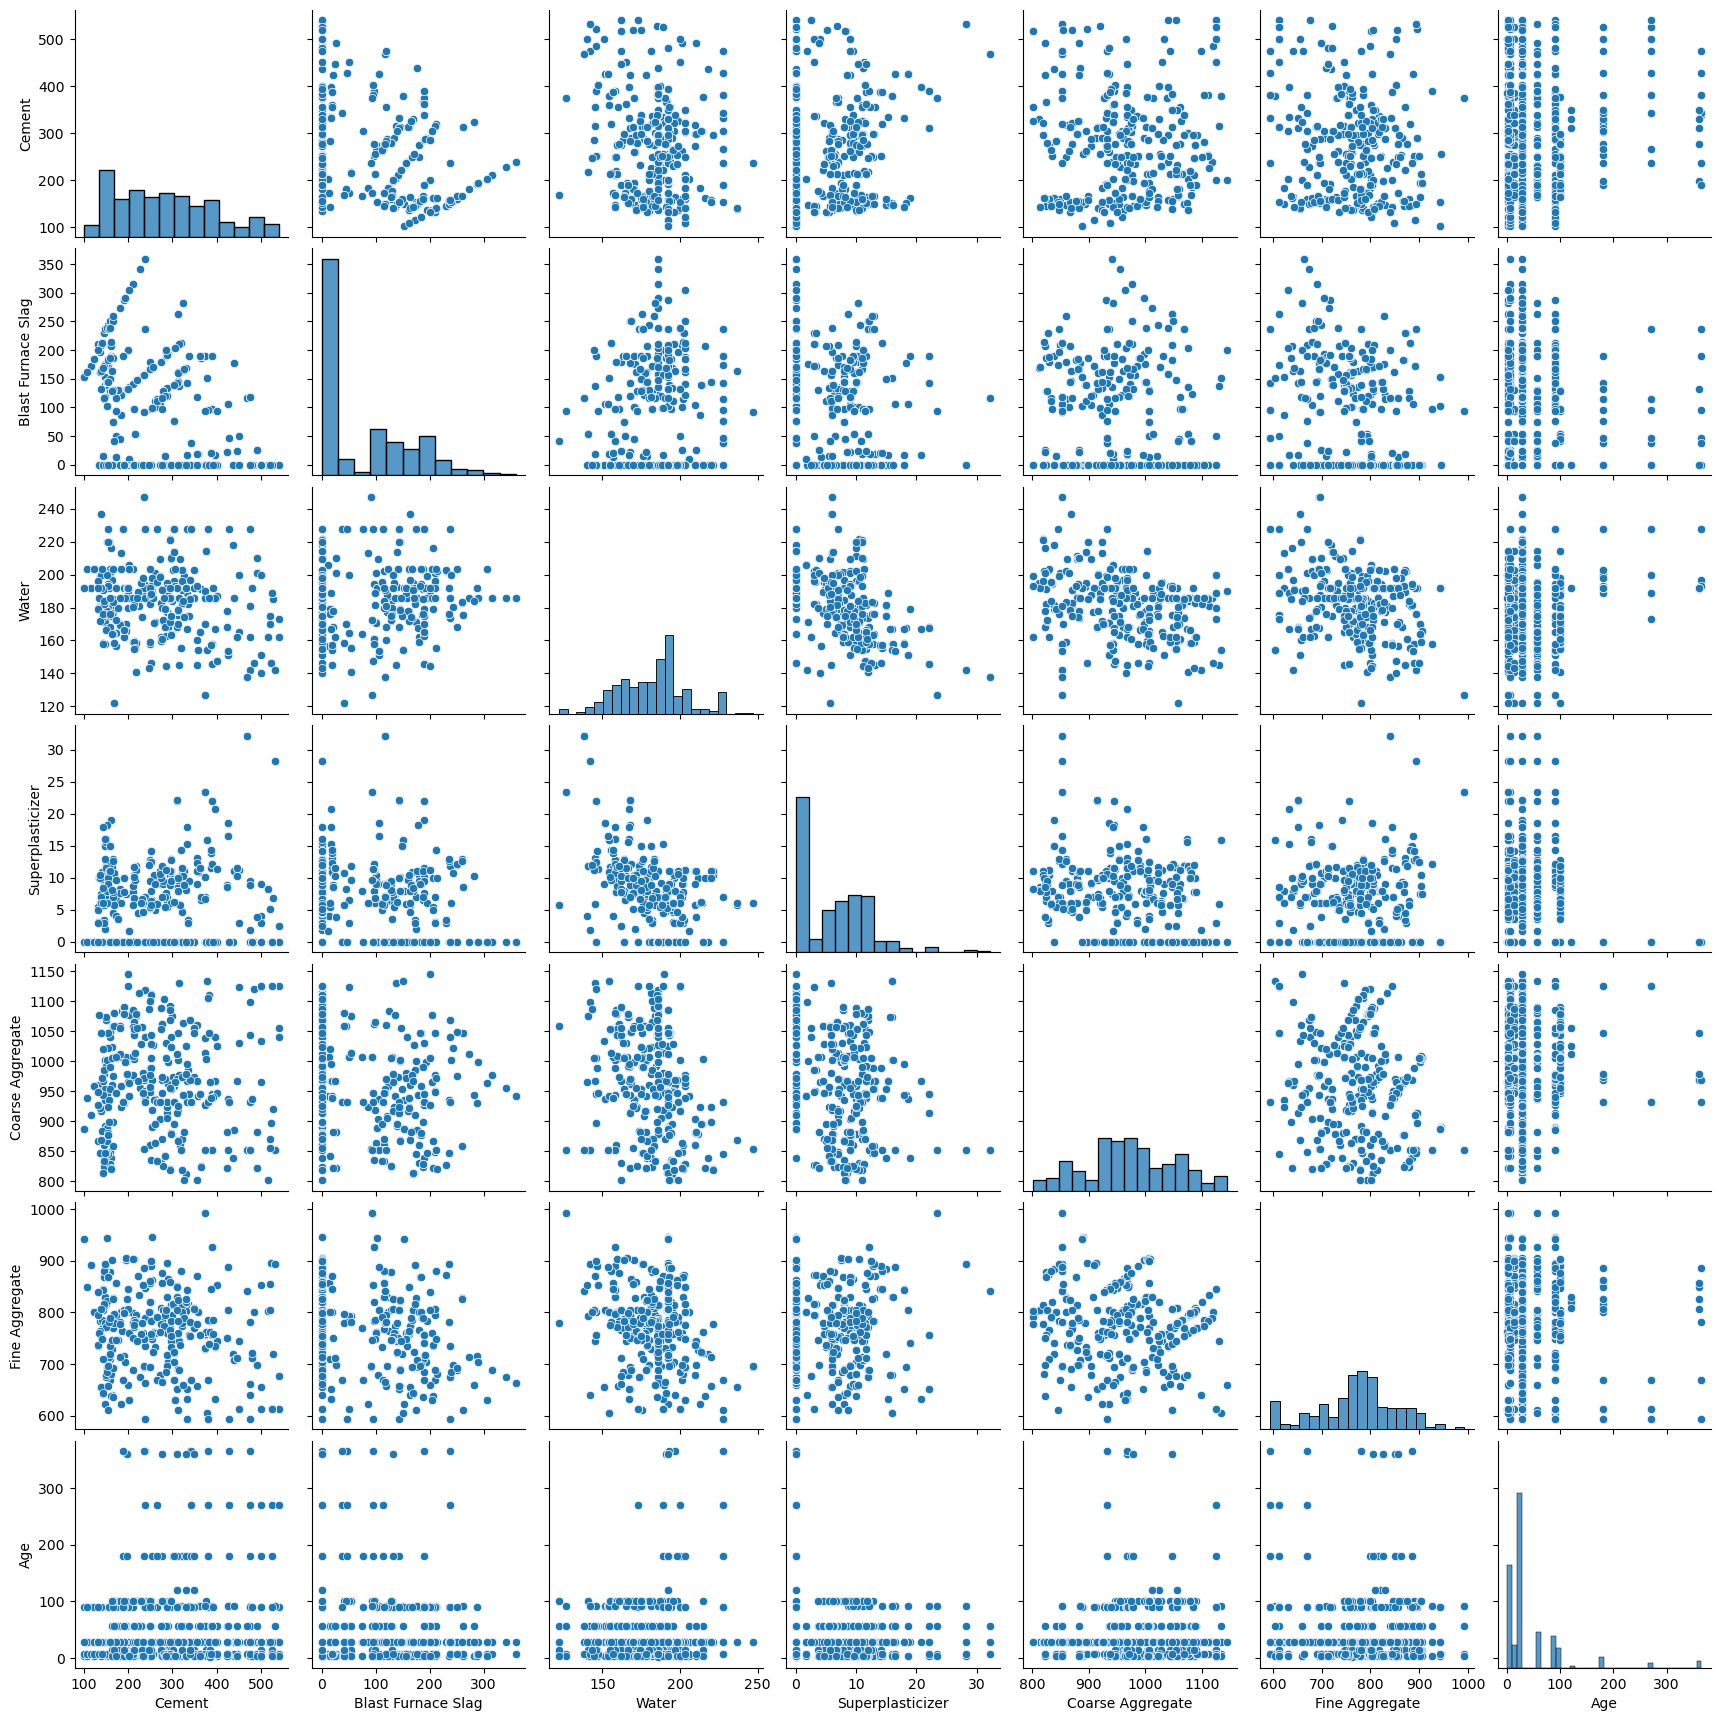

In [6]:
sns.pairplot(x_train)

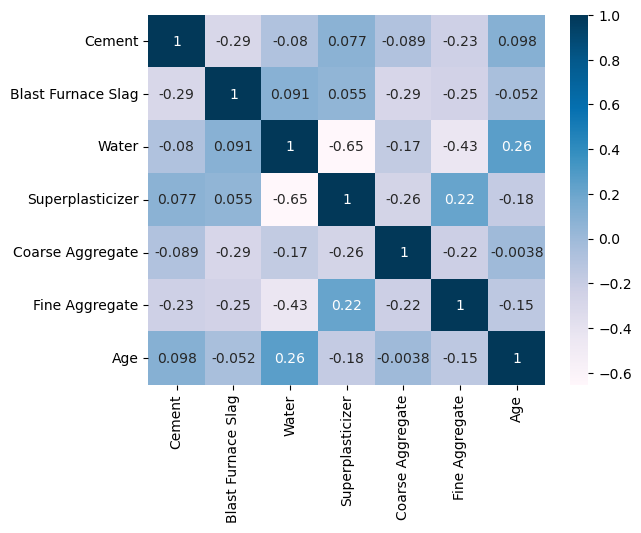

In [7]:
#문제4
sns.heatmap(x_train.corr(), cmap = plt.cm.PuBu, linecolor = "white", annot = True)

In [8]:
#문제5
#VIF란 설명 변수간 상관 관계가 있는지 측정하는 척도이다. 보통 VIF가 10이 넘으면 다중공선성 있다고 판단한다.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif

,VIF Factor,features
0,8.639729,Cement
1,2.079565,Blast Furnace Slag
2,69.393246,Water
3,3.097767,Superplasticizer
4,78.341906,Coarse Aggregate
5,64.950163,Fine Aggregate
6,1.684111,Age


In [9]:
x_train.drop(['Coarse Aggregate'], axis=1, inplace=True)
x_test.drop(['Coarse Aggregate'], axis=1, inplace=True)

In [10]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif

,VIF Factor,features
0,8.421393,Cement
1,2.073446,Blast Furnace Slag
2,52.165396,Water
3,3.091247,Superplasticizer
4,46.716778,Fine Aggregate
5,1.681338,Age


In [11]:
x_train.drop(['Water'], axis=1, inplace=True)
x_test.drop(['Water'], axis=1, inplace=True)

In [12]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif

,VIF Factor,features
0,7.061091,Cement
1,1.703298,Blast Furnace Slag
2,2.249873,Superplasticizer
3,8.957471,Fine Aggregate
4,1.599474,Age


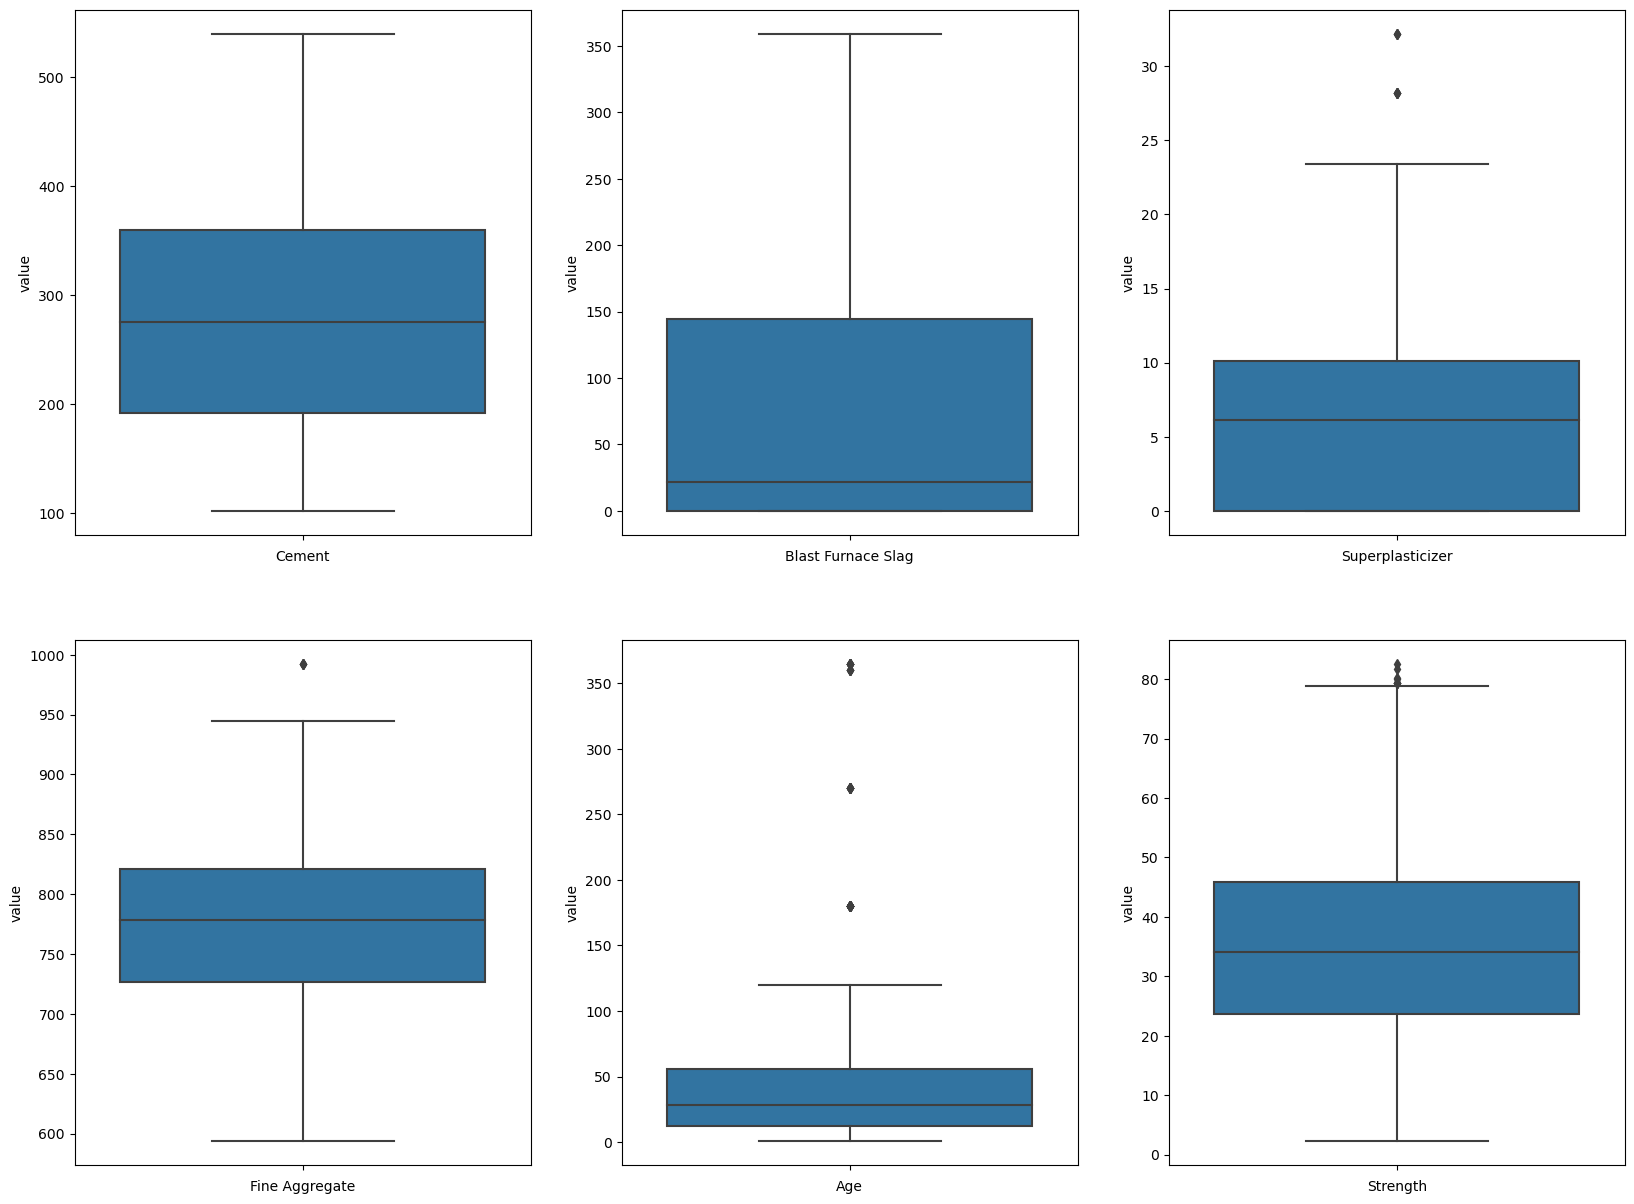

In [13]:
#문제6
train = x_train.copy()
train['Strength'] = y_train

fig = plt.figure(figsize=(20,15))
for i, v in enumerate(train.columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=v,data=train)
    plt.xlabel(v)
    plt.ylabel('value')

In [14]:
#문제 7
from outlier import del_outlier

x_train2, y_train2 = del_outlier(x_train, y_train)
x_train2

,Cement,Blast Furnace Slag,Superplasticizer,Fine Aggregate,Age
0,158.6,148.9,15.0,719.7,28
1,424.0,22.0,8.5,750.0,28
2,275.1,0.0,9.9,777.5,3
3,252.0,97.0,8.0,821.0,28
4,168.9,42.2,10.8,796.2,3
...,...,...,...,...,...
819,286.3,200.9,11.2,803.7,3
820,246.8,0.0,12.0,800.9,14
821,190.3,0.0,9.9,798.9,100
822,475.0,118.8,8.9,781.5,28


In [15]:
#문제8
from transform import Scaling

scl = Scaling(x_train2)
x_train3, x_test = scl.minmax_scaling(x_test)

In [16]:
x_train3.describe()

,Cement,Blast Furnace Slag,Superplasticizer,Fine Aggregate,Age
count,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.396835,0.208567,0.276549,0.513246,0.262298
std,0.239517,0.243793,0.240040,0.217023,0.237499
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200913,0.000000,0.000000,0.401567,0.050420
50%,0.343607,0.061213,0.298643,0.527920,0.226891
75%,0.563927,0.403450,0.457014,0.639601,0.226891
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])]
vif["features"] = x_train3.columns
vif

,VIF Factor,features
0,1.244077,Cement
1,1.271395,Blast Furnace Slag
2,1.025358,Superplasticizer
3,1.249930,Fine Aggregate
4,1.004782,Age
5,20.179340,one


# chapter 3

In [17]:
#문제3
from matrix import LSE

lse = LSE(x_train3, y_train2)

In [18]:
#문제4
lse.describe('hi')

Exception: Nont Defined

In [20]:
#문제5
beta, pred = lse.normal_eq()

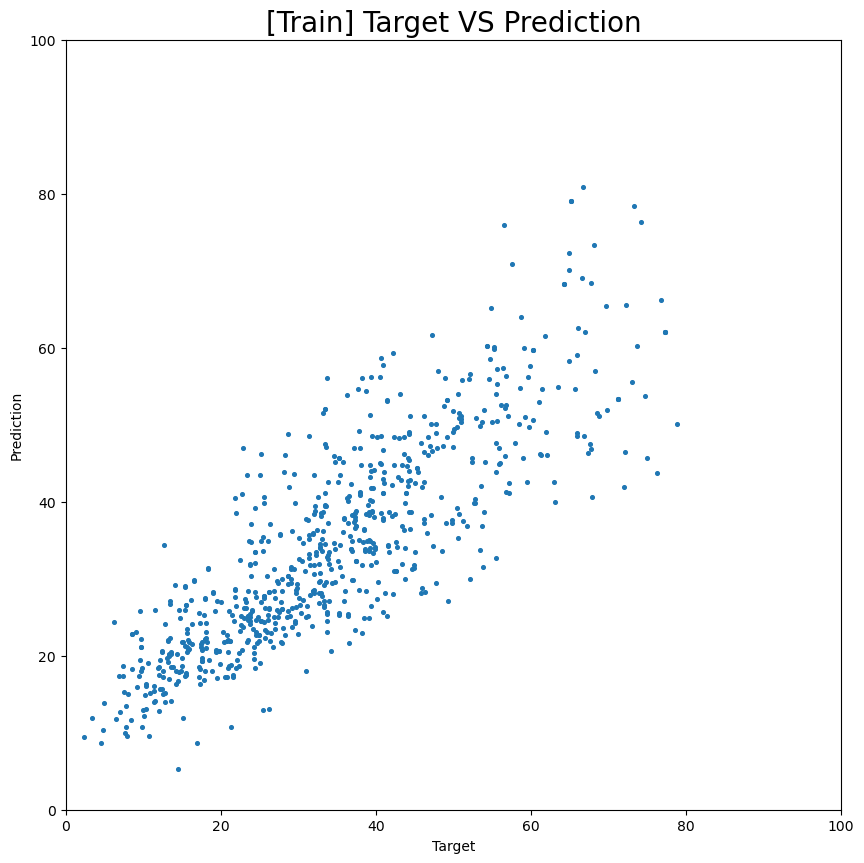

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(y_train2, pred, s=7)
plt.title("[Train] Target VS Prediction", fontsize=20)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [22]:
#문제6
te_pred = lse.predict(x_test)

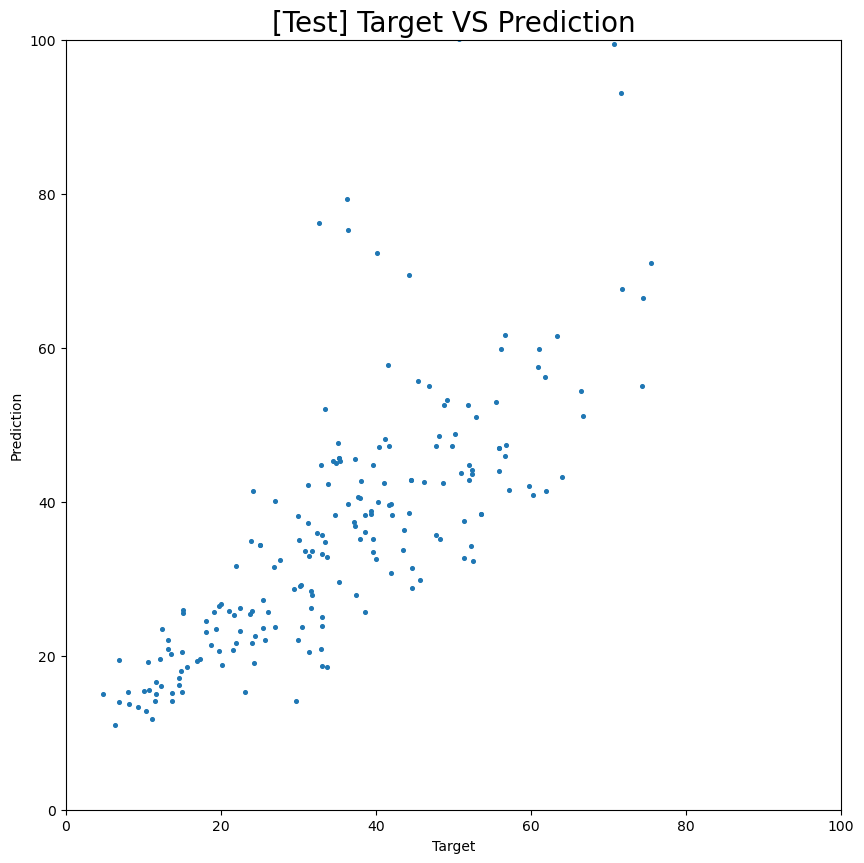

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, te_pred, s=7)
plt.title("[Test] Target VS Prediction", fontsize=20)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

# chapter 4

In [29]:
#문제1
print('''경사하강법이란 손실 함수의 기울기를 활용하여 손실이 가장 작은 값을 찾아가는 방법이다.
x' = x - lr*기울기''')

경사하강법이란 손실 함수의 기울기를 활용하여 손실이 가장 작은 값을 찾아가는 방법이다.
x' = x - lr*기울기


In [1]:
import torch
import time
import pandas as pd
from model import Model


class GradientDescent(Model):
    def __init__(self, data1, data2):
        """
        :param
        data1   : Model 클래스와 동일
        data2   : Model 클래스와 동일
        """

    # 1. Model 클래스가 GD 클래스의 부모 클래스가 될 수 있도록 코드를 작성해 주세요. (HINT: 20번째 줄 괄호 안에 코드를 작성하세요.)
    # 2. super()를 통해 Model 클래스의 method와 입력들을 GradientDescent로 가져오세요. (HINT: super().__init__()을 사용하세요.)
    # 3. 필요한 회귀계수의 수만큼 self.theta_i(ex) self.theta_1)와 self.bias를 객체로 만들고, gradient가 흐를 수 있는 tensor를 저장해 주세요.
    #    (HINT: torch.ones()를 사용하고, requires_grad 인자를 알아보세요.)
    # 4. Model 클래스의 self.X_mat의 모든 열들을 분리하여 각 tensor로 저장하세요. (HINT: torch.as_tensor()를 사용하세요.)
    # 5. 회귀계수의 변화 과정을 저장하기 위해 각 회귀계수의 이름(theta_1, bias 등)을 key로 하고 빈 list를 value로 갖는 dictionary를 생성하세요.
    # 6. 손실함수 값의 변화 과정을 저장하기 위해 self.cost_hist에 빈 list를 저장하세요. 그리고 self.cost에 0을 저장하여 초기화하세요.
    # 7. 예측값을 저장하기 위한 빈 객체로 self.pred를 생성하세요.
    
    super().__init__(data1, data2)
    
    self.bias = torch.ones(1)
    self.theta_1 = torch.ones(self.n, requires_grad = True)
    self.theta_2 = torch.ones(self.n, requires_grad = True)
    self.theta_3 = torch.ones(self.n, requires_grad = True)
    self.theta_4 = torch.ones(self.n, requires_grad = True)
    self.theta_5 = torch.ones(self.n, requires_grad = True)
    self.theta_6 = torch.ones(self.n, requires_grad = True)
    
    for i in range(self.n):
        self.col_tensor = torch.as_tensor(self.X_mat[:,i])
    
#     for i in range(self.n):
#         globals()[self.'theta_' + str(i+1)] = torch.ones(self.n)

    self.theta_hist = dict(bias=[], theta_1=[], theta_2=[], theta_3=[], 
                           theta_4=[], theta_5=[], theta_6=[])
    self.cost_hist = []
    self.cost = 0
    self.pred = None

    def compute_cost(self):
        """
        :return: MSE 값을 반환합니다.
        """

        # 1. self.pred와 실제값 self.y를 사용하여 MSE를 계산하고, self.cost에 저장하여 반환하세요.
        self.cost = self.pred - self.y
        return self.cost

    def compute_gradient(self):
        """
        :param
        num_iter   : 반복횟수를 지정합니다.   (형식: int)
        lr         : 학습률을 지정합니다.     (형식: float)
        optimizer  : optimizer를 지정합니다. (형식: torch.optim)
        :return: self.theta, self.cost_hist, self.theta_hist, self.train_pred
        """

        # 1. 입력받은 optimizer로 회귀계수를 업데이트하기 위한 optimizer 객체를 생성하세요. (HINT: optimizer(회귀계수 목록, lr=학습률) 형태입니다.
        # 2. 모형 적합에 소요되는 시간을 측정하기 위해 start 객체에 현재 시간을 저장하세요.
        # 3. num_iter만큼 for문을 반복하여 회귀계수를 적합하세요.
        # 3-1. 각 theta와 대응되는 X의 열들을 곱하여 self.pred에 저장하세요.
        # 3-2. cost를 계산하고, self.cost_hist에 저장하도록 하세요.
        # 3-3. self.theta_hist의 각 key에 대응되는 theta값들을 저장하세요. (HINT: tensor.clone().detach().numpy()로 저장하는 것이 안전합니다.)
        # 3-4. cost를 역전파시키고, optimizer가 알맞은 회귀계수를 추정해나갈 수 있도록 하세요.
        # 3-5. 100번의 Epoch마다 소요된 시간과 손실함수 값을 반환하게 하세요.
        # 4. self.train_pred에 for문의 마지막 self.pred값을 저장하세요. (HINT: tensor.detach().numpy()를 사용하세요.)
        # 5. self.theta에 최종 theta 값을 list 형태로 저장하세요. (HINT: 각 theta 값에 tensor.detach().numpy()를 사용하세요.)
        
        


RuntimeError: super(): no arguments